In [2]:
import importlib
import RNN
from RNN import *
importlib.reload(RNN)

<module 'RNN' from '/home/yvette/caltech/cs156b/two_and_a_half_cs_majors/RNN/RNN.py'>

In [3]:
path = 'data/us/covid/nyt_us_counties_daily.csv'
counties_df = load_county_data(path)

In [4]:
counties_df.head()

,fips,date,county,state,cases,deaths,states_encoded
0,53061,2020-01-21,Snohomish,Washington,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,53061,2020-01-22,Snohomish,Washington,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,53061,2020-01-23,Snohomish,Washington,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,53061,2020-01-24,Snohomish,Washington,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,53061,2020-01-25,Snohomish,Washington,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


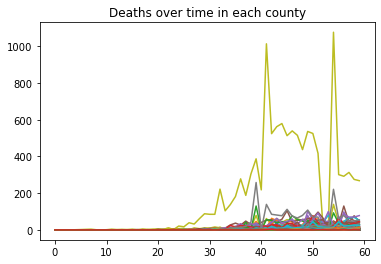

<Figure size 432x288 with 0 Axes>

In [5]:
train_inputs, train_targets, train_conditions, test_inputs, \
    test_targets, test_conditions, inputs_total, conditions_total \
    = generate_county_sets(counties_df, split_point=40)

In [6]:
print(train_inputs.shape)
print(train_targets.shape)

print(train_conditions.shape)

(10920, 10, 3)
(10920, 3)
(10920, 52)


In [7]:
print(test_inputs.shape)
print(test_targets.shape)
print(test_conditions.shape)

(3640, 10, 3)
(3640, 3)
(3640, 52)


In [8]:
# For some reason, it won't let me make a model here? so the
# model is made in RNN.py and imported.
# model = MySimpleModel()

model, history = train_rnn(model, train_inputs, train_targets,
                           train_conditions, test_inputs,
                           test_targets, test_conditions)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Please report th

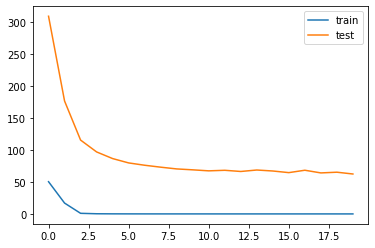

In [9]:
plot_loss(history)

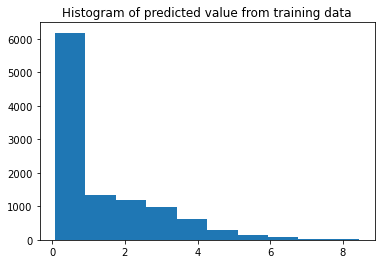

In [10]:
plot_hist(model, train_inputs, train_conditions)

Generating predictions:


ValueError: x and y must have same first dimension, but have shapes (20,) and (21,)

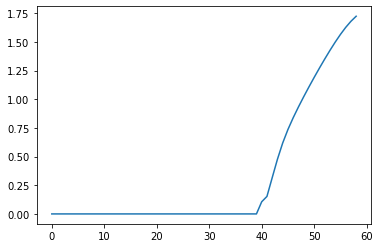

In [11]:
plot_predicted_vs_true(model, inputs_total, conditions_total)